In [1]:
import numpy as np 
import pandas as pd 
data = pd.read_csv(r'C:\\python\\p\\high_diamond_ranked_10min.csv') 
data.head()

In [2]:
## 데이터 type과 상관관계확인 
corr=data.corr()
data.info(), corr['blueWins'].sort_values(ascending=False)

## 와드설치

In [3]:
## 와드설치에 따른 승리 
win=data[data.blueWins == 1]['blueWardsPlaced'].mean()
lose=data[data.blueWins == 0]['blueWardsPlaced'].mean()
print("이길때 와드설치갯수: ",win)
print("질때 와드설치갯수: ",lose)

## 와드 설치 개수와 승리는 연관이 크게 없다.


이길때 와드설치갯수:  22.289858012170384
질때 와드설치갯수:  22.28672459082643


In [4]:
## 와드설치갯수 차이에 따른 승리
data['WardsPlacedDiff'] = data['blueWardsPlaced'] - data['redWardsPlaced']
win=data[data.blueWins == 1]['WardsPlacedDiff'].mean()
lose=data[data.blueWins == 0]['WardsPlacedDiff'].mean()
print("이길때 와드설치갯수차이: ",win)
print("질때 와드설치갯수차이: ",lose)

# features 제거
drop_cols = ['blueWardsPlaced','redWardsPlaced']
data.drop(drop_cols, axis=1, inplace=True)


이길때 와드설치갯수차이:  0.35963488843813385
질때 와드설치갯수차이:  -0.5172762174176602


## 와드제거

In [5]:
## 와드제거에 따른 승리
win=data[data.blueWins == 1]['blueWardsDestroyed'].mean()
lose=data[data.blueWins == 0]['blueWardsDestroyed'].mean()
print("이길때 와드제거갯수: ",win)
print("질때 와드제거갯수: ",lose)

## 이길때 와드를 좀더 제거합니다.



이길때 와드제거갯수:  2.9212981744421906
질때 와드제거갯수:  2.728834107900586


In [6]:
## 와드제거차이에 따른 승리
data['WardsDestroyedDiff'] = data['blueWardsDestroyed'] - data['redWardsDestroyed']
win=data[data.blueWins == 1]['WardsDestroyedDiff'].mean()
lose=data[data.blueWins == 0]['WardsDestroyedDiff'].mean()
print("이길때 와드제거갯수차이: ",win)
print("질때 와드제거갯수차이: ",lose)

# features 제거
drop_cols = ['blueWardsDestroyed','redWardsDestroyed']
data.drop(drop_cols, axis=1, inplace=True)


이길때 와드제거갯수차이:  0.31683569979716025
질때 와드제거갯수차이:  -0.11254798949282684


## 퍼블

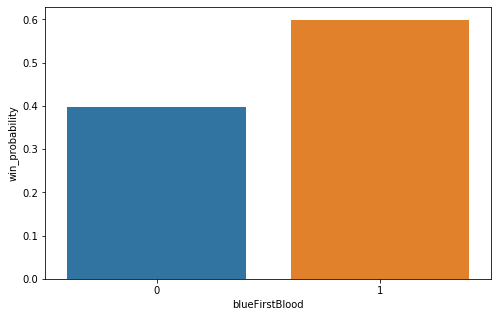

In [7]:
## 퍼블에 따른 승리
from matplotlib import pyplot as plt
import seaborn as sns
prob_wins = data.groupby('blueFirstBlood')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueFirstBlood', 'win_probability']
plt.figure(figsize=(8,5))
ax = sns.barplot(x="blueFirstBlood", y="win_probability", data=prob_wins)

## 퍼블한팀일수록 승리에 대한 확률이 올라간다.

# features 제거
drop_cols = ['redFirstBlood']
data.drop(drop_cols, axis=1, inplace=True)

## 킬수

In [8]:
## 킬수에 따른 승리
win=data[data.blueWins == 1]['blueKills'].mean()
lose=data[data.blueWins == 0]['blueKills'].mean()
print("이길때 킬수: ",win)
print("질때 킬수: ",lose)

## 많은킬수할수록 승리한다.

이길때 킬수:  7.201622718052739
질때 킬수:  5.170135380885028


이길때 킬차이:  2.061257606490872
질때 킬차이:  -1.9610022226712467


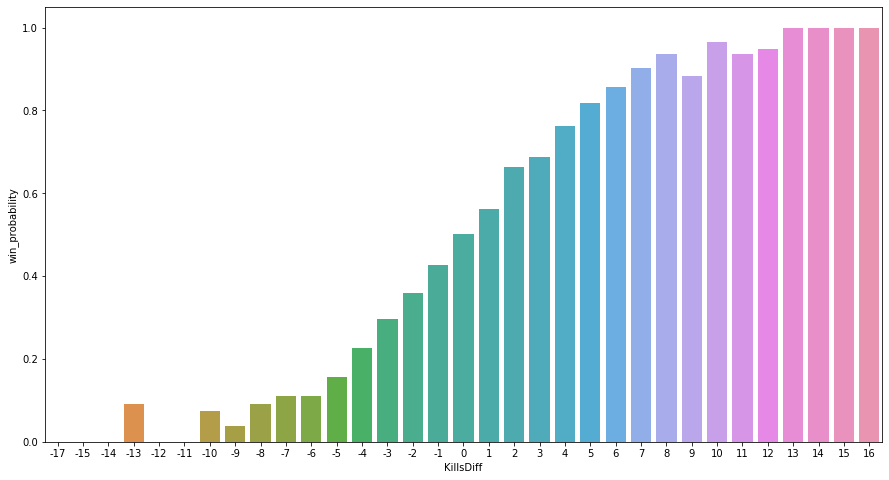

In [9]:
## 킬수차이 따른 승리
data['KillsDiff'] = data['blueKills'] - data['redKills']
win=data[data.blueWins == 1]['KillsDiff'].mean()
lose=data[data.blueWins == 0]['KillsDiff'].mean()
print("이길때 킬차이: ",win)
print("질때 킬차이: ",lose)

## 킬차이가 많을때마다 승리

prob_wins = data.groupby('KillsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['KillsDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="KillsDiff", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueKills','redKills']
data.drop(drop_cols, axis=1, inplace=True)

## 죽음

In [10]:
## 죽음에 따른 승리
win=data[data.blueWins == 1]['blueDeaths'].mean()
lose=data[data.blueWins == 0]['blueDeaths'].mean()
print("이길때 죽음수: ",win)
print("질때 죽음수: ",lose)

## 당연많이죽을수록 진다.

이길때 죽음수:  5.1403651115618665
질때 죽음수:  7.131137603556274


이길때 죽음수차이:  -2.061257606490872
질때 죽음수차이:  1.9610022226712467


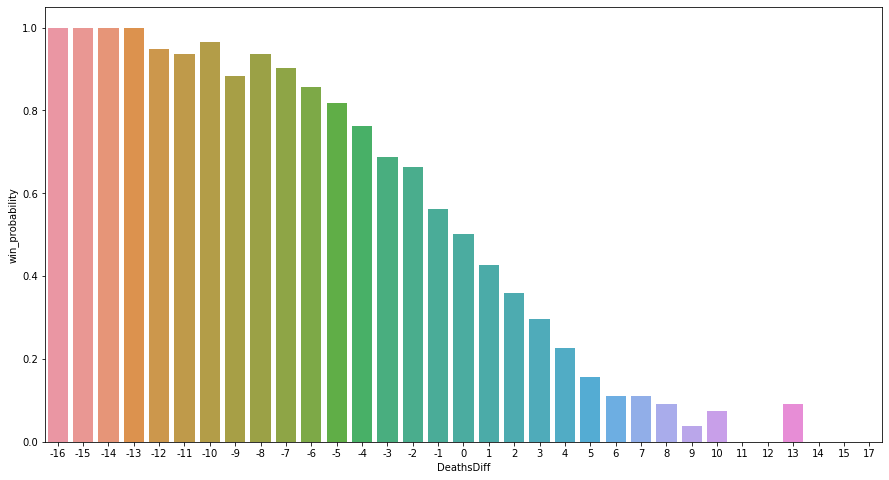

In [11]:
## 죽음수차이에 따른 승리
data['DeathsDiff'] = data['blueDeaths'] - data['redDeaths']
win=data[data.blueWins == 1]['DeathsDiff'].mean()
lose=data[data.blueWins == 0]['DeathsDiff'].mean()
print("이길때 죽음수차이: ",win)
print("질때 죽음수차이: ",lose)

## 킬차이가 많을때마다 승리

prob_wins = data.groupby('DeathsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['DeathsDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="DeathsDiff", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueDeaths','redDeaths']
data.drop(drop_cols, axis=1, inplace=True)

## 어시스트

In [12]:
## 어식스트에 따른 승리
win=data[data.blueWins == 1]['blueAssists'].mean()
lose=data[data.blueWins == 0]['blueAssists'].mean()
print("이길때 죽음수: ",win)
print("질때 죽음수: ",lose)



이길때 죽음수:  7.771805273833672
질때 죽음수:  5.522731865023237


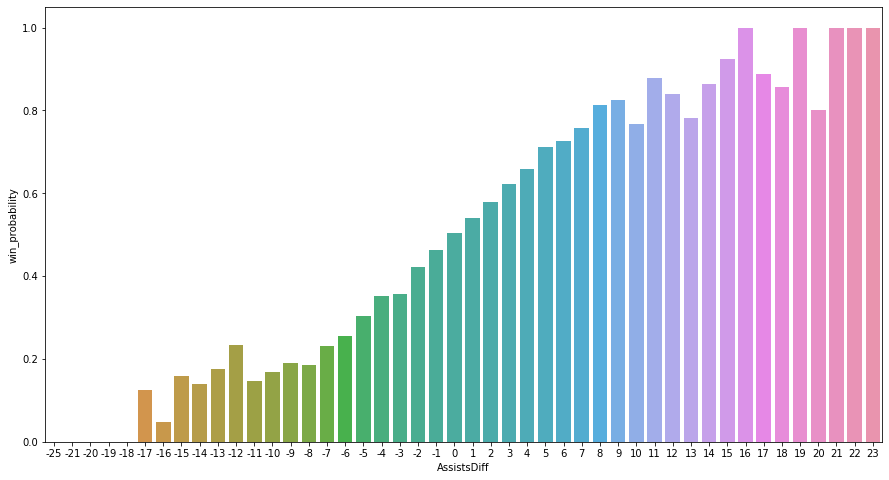

In [13]:
## 어식스트차이에 따른 승리
data['AssistsDiff'] = data['blueAssists'] - data['redAssists']
prob_wins = data.groupby('AssistsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['AssistsDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="AssistsDiff", y="win_probability", data=prob_wins)

## 킬이랑은 조금 다름 

# features 제거
drop_cols = ['blueAssists','redAssists']
data.drop(drop_cols, axis=1, inplace=True)

## 중립몹 제거

In [14]:
## 드래곤 전령 처리수에 따른 승리
win=data[data.blueWins == 1]['blueEliteMonsters'].mean()
lose=data[data.blueWins == 0]['blueEliteMonsters'].mean()
print("이길때 드래곤 전령 처리수: ",win)
print("질때 드래곤 전령 처리수: ",lose)

이길때 드래곤 전령 처리수:  0.6890466531440163
질때 드래곤 전령 처리수:  0.41139624166498284


이길때 드래곤 전령 처리수차이:  0.25496957403651116
질때 드래곤 전령 처리수차이:  -0.3002626793291574


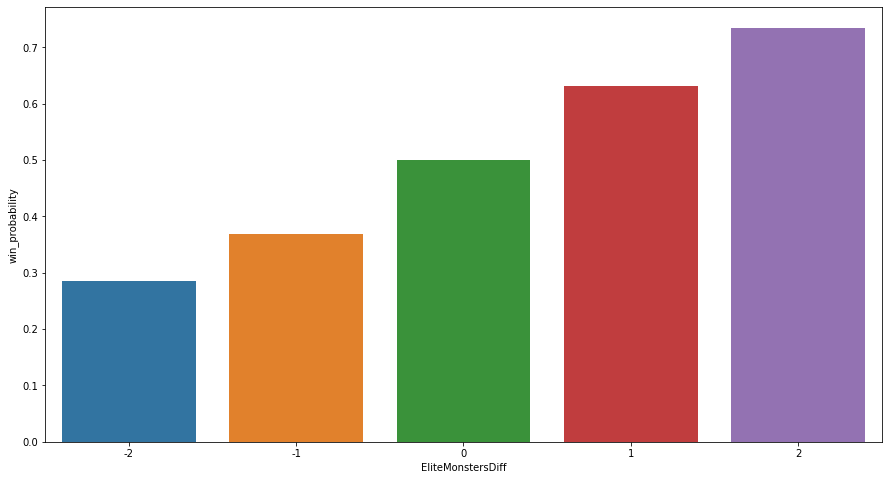

In [15]:
## 드래곤 전령 처리수차이에 따른 승리
data['EliteMonstersDiff'] = data['blueEliteMonsters'] - data['redEliteMonsters']
win=data[data.blueWins == 1]['EliteMonstersDiff'].mean()
lose=data[data.blueWins == 0]['EliteMonstersDiff'].mean()
print("이길때 드래곤 전령 처리수차이: ",win)
print("질때 드래곤 전령 처리수차이: ",lose)

prob_wins = data.groupby('EliteMonstersDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['EliteMonstersDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="EliteMonstersDiff", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueEliteMonsters','redEliteMonsters']
data.drop(drop_cols, axis=1, inplace=True)

## 드래곤 

In [16]:
## 드래곤 처리에따른 승리
win=data[data.blueWins == 1]['blueDragons'].mean()
lose=data[data.blueWins == 0]['blueDragons'].mean()
print("이길때 드래곤  처리수: ",win)
print("질때 드래곤  처리수: ",lose)

이길때 드래곤  처리수:  0.4649087221095335
질때 드래곤  처리수:  0.25944635279854517


이길때 드래곤  처리수차이:  0.15517241379310345
질때 드래곤  처리수차이:  -0.25661749848454235


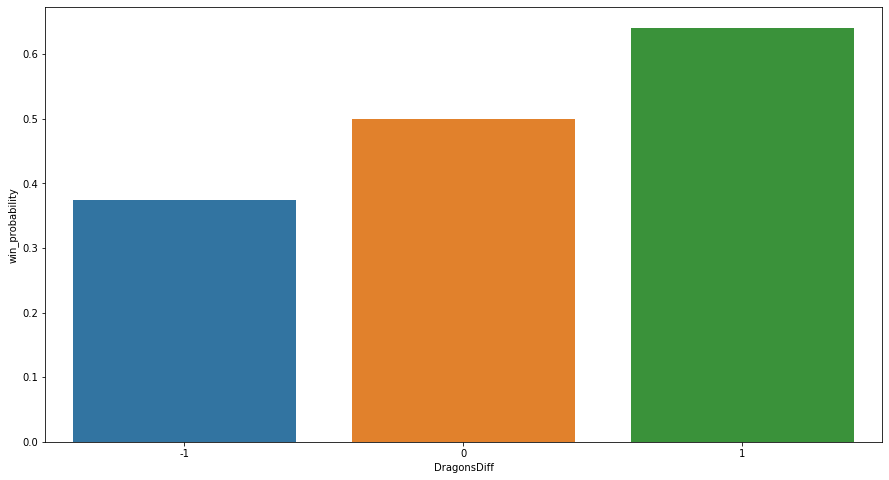

In [17]:
## 드래곤  처리수차이에 따른 승리
data['DragonsDiff'] = data['blueDragons'] - data['redDragons']
win=data[data.blueWins == 1]['DragonsDiff'].mean()
lose=data[data.blueWins == 0]['DragonsDiff'].mean()
print("이길때 드래곤  처리수차이: ",win)
print("질때 드래곤  처리수차이: ",lose)

prob_wins = data.groupby('DragonsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['DragonsDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="DragonsDiff", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueDragons','redDragons']
data.drop(drop_cols, axis=1, inplace=True)

## 전령

In [18]:
## 전령 처리에따른 승리
win=data[data.blueWins == 1]['blueHeralds'].mean()
lose=data[data.blueWins == 0]['blueHeralds'].mean()
print("이길때 전령  처리수: ",win)
print("질때 전령  처리수: ",lose)

이길때 전령  처리수:  0.22413793103448276
질때 전령  처리수:  0.15194988886643768


이길때 전령  처리수차이:  0.0997971602434077
질때 전령  처리수차이:  -0.04364518084461507


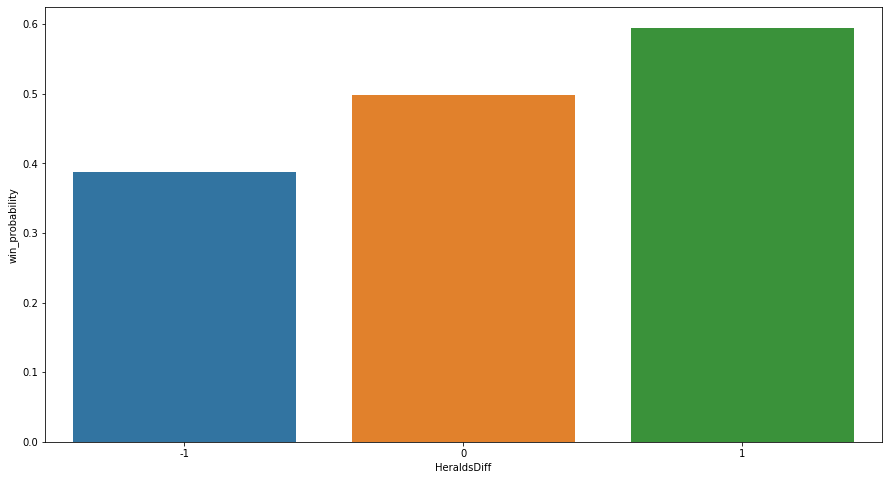

In [19]:
# 전령 처리수차이에 따른 승리
data['HeraldsDiff'] = data['blueHeralds'] - data['redHeralds']
win=data[data.blueWins == 1]['HeraldsDiff'].mean()
lose=data[data.blueWins == 0]['HeraldsDiff'].mean()
print("이길때 전령  처리수차이: ",win)
print("질때 전령  처리수차이: ",lose)

prob_wins = data.groupby('HeraldsDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['HeraldsDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="HeraldsDiff", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueHeralds','redHeralds']
data.drop(drop_cols, axis=1, inplace=True)

## 타워제거

In [20]:
## 타워재거에 따른 승리
win=data[data.blueWins == 1]['blueTowersDestroyed'].mean()
lose=data[data.blueWins == 0]['blueTowersDestroyed'].mean()
print("이길때 타워재거 수: ",win)
print("질때 타워재거 수: ",lose)

이길때 타워재거 수:  0.0797160243407708
질때 타워재거 수:  0.02323701757930895


이길때 타워재거 차이:  0.05922920892494929
질때 타워재거 차이:  -0.042230753687613656


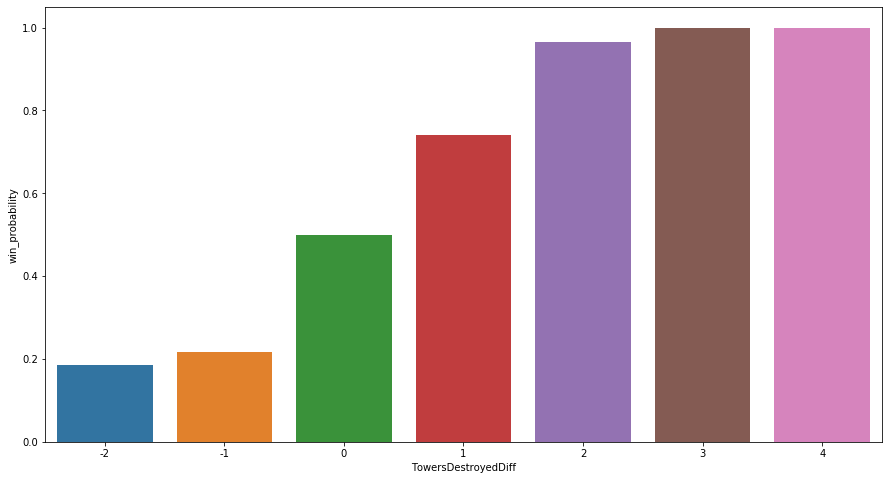

In [21]:
## 타워재거 차이에 따른 승리
data['TowersDestroyedDiff'] = data['blueTowersDestroyed'] - data['redTowersDestroyed']
win=data[data.blueWins == 1]['TowersDestroyedDiff'].mean()
lose=data[data.blueWins == 0]['TowersDestroyedDiff'].mean()
print("이길때 타워재거 차이: ",win)
print("질때 타워재거 차이: ",lose)

prob_wins = data.groupby('TowersDestroyedDiff')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['TowersDestroyedDiff', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="TowersDestroyedDiff", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueTowersDestroyed','redTowersDestroyed']
data.drop(drop_cols, axis=1, inplace=True)

## 골드

In [22]:
data['blueTotalGold'].corr(data['blueGoldPerMin'])

0.9999999999999991

In [23]:
data['blueTotalGold'].corr(data['blueTotalMinionsKilled'])

0.284902292498624

In [24]:
## 골드에 따른 승리
win=data[data.blueWins == 1]['blueTotalGold'].mean()
lose=data[data.blueWins == 0]['blueTotalGold'].mean()
print("이길때 골드 : ",win)
print("질때 골드 : ",lose)


이길때 골드 :  17145.263894523327
질때 골드 :  15864.111133562335


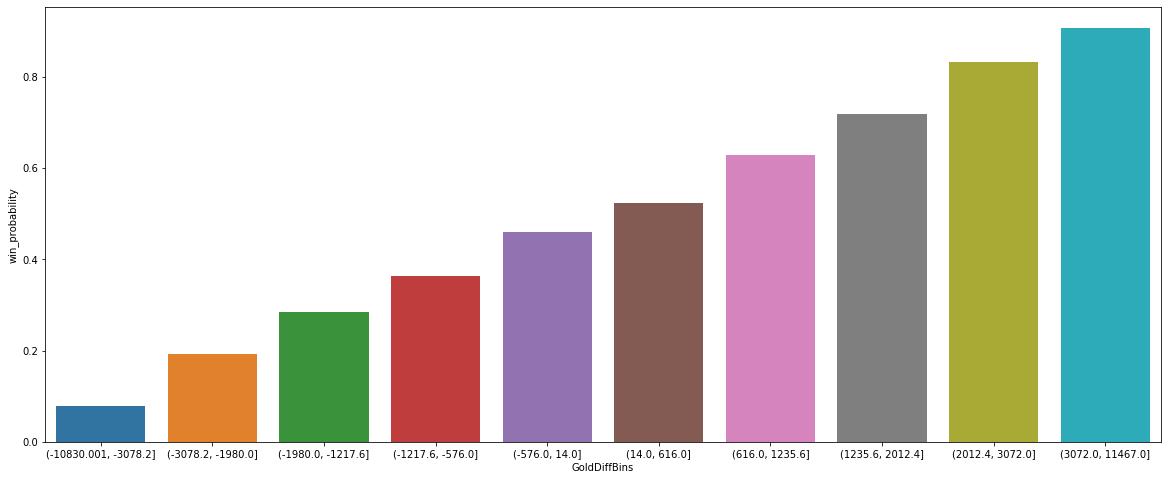

In [25]:
## 골드차이에 따른 승리
data['GoldDiffBins'] = pd.qcut(data['blueGoldDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('GoldDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['GoldDiffBins', 'win_probability']
plt.figure(figsize=(20,8))
ax = sns.barplot(x="GoldDiffBins", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueTotalGold','redTotalGold','GoldDiffBins','redGoldDiff']
data.drop(drop_cols, axis=1, inplace=True)

## 평균레벨

In [26]:
data['blueAvgLevel'].corr(data['blueTotalExperience'])

0.9012967936375037

In [27]:
## 레벨에 따른 승리
win=data[data.blueWins == 1]['blueAvgLevel'].mean()
lose=data[data.blueWins == 0]['blueAvgLevel'].mean()
print("이길때 레벨 : ",win)
print("질때 레벨 : ",lose)

이길때 레벨 :  7.025395537525382
질때 레벨 :  6.8070317235804305


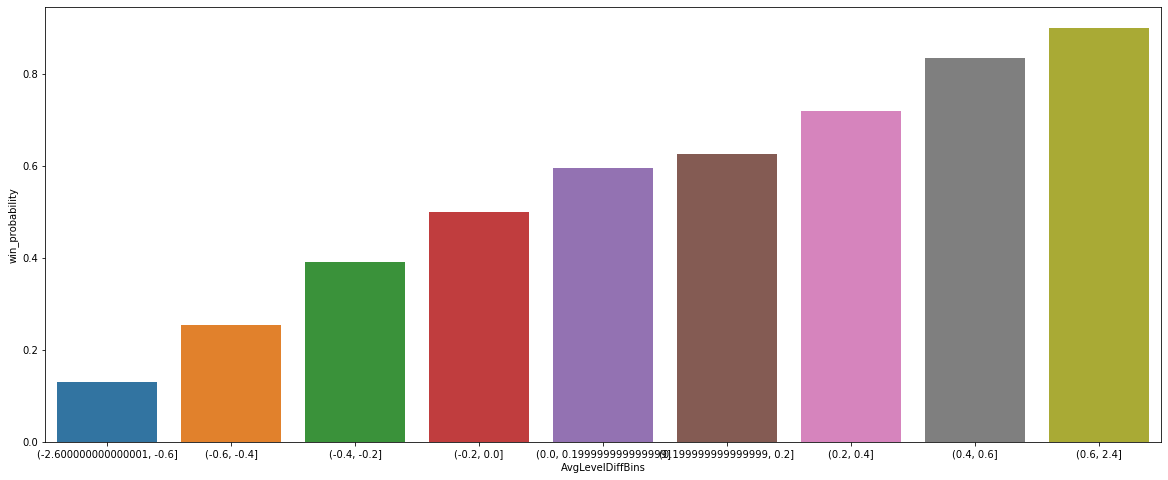

In [28]:
## 레벨차이에 따른 승리
data['AvgLevelDiff'] = data['blueAvgLevel'] - data['redAvgLevel']
data['AvgLevelDiffBins'] = pd.qcut(data['AvgLevelDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('AvgLevelDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['AvgLevelDiffBins', 'win_probability']
plt.figure(figsize=(20,8))
ax = sns.barplot(x="AvgLevelDiffBins", y="win_probability", data=prob_wins)

# features 제거
## 레벨은 경험치와 비례하기 떄문에 제거
drop_cols = ['blueAvgLevel','redAvgLevel','AvgLevelDiff','AvgLevelDiffBins']
data.drop(drop_cols, axis=1, inplace=True)

## 경험치

In [29]:
## 경험치에 따른 승리
win=data[data.blueWins == 1]['blueTotalExperience'].mean()
lose=data[data.blueWins == 0]['blueTotalExperience'].mean()
print("이길때 경험치 : ",win)
print("질때 경험치 : ",lose)

이길때 경험치 :  18404.57789046653
질때 경험치 :  17453.47161042635


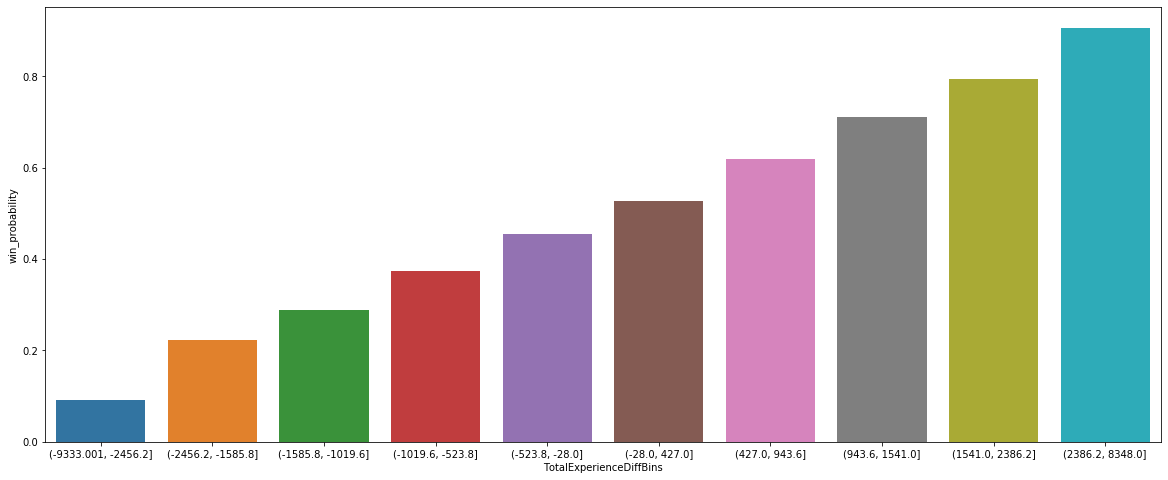

In [30]:
## 경험치차이에 따른 승리
data['TotalExperienceDiffBins'] = pd.qcut(data['blueExperienceDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('TotalExperienceDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['TotalExperienceDiffBins', 'win_probability']
plt.figure(figsize=(20,8))
ax = sns.barplot(x="TotalExperienceDiffBins", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueTotalExperience','redTotalExperience','TotalExperienceDiffBins','redExperienceDiff']
data.drop(drop_cols, axis=1, inplace=True)

## CS

In [31]:
data['blueGoldDiff'].corr(data['blueTotalMinionsKilled'])

0.45049741625219525

In [32]:
data['blueTotalMinionsKilled'].corr(data['blueCSPerMin'])

0.9999999999999998

In [33]:
## CS에 따른 승리
win=data[data.blueWins == 1]['blueTotalMinionsKilled'].mean()
lose=data[data.blueWins == 0]['blueTotalMinionsKilled'].mean()
print("이길때 CS : ",win)
print("질때 CS : ",lose)

이길때 CS :  221.62494929006084
질때 CS :  211.79308951303292


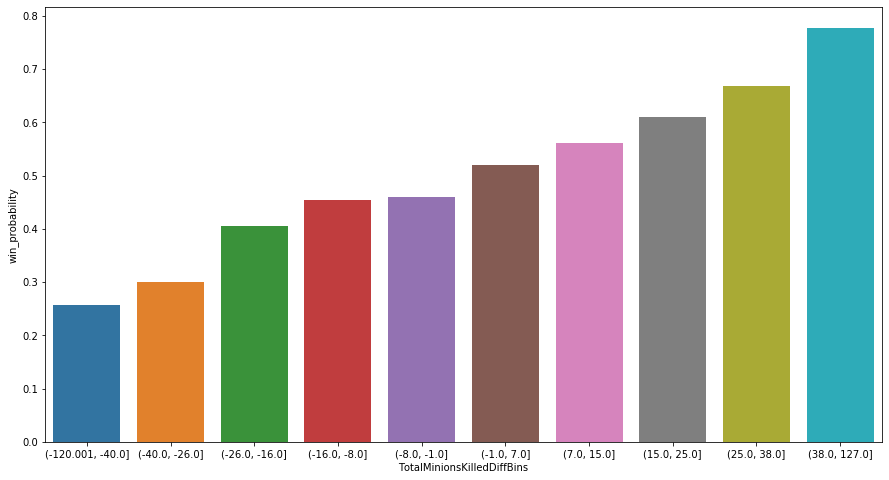

In [34]:
## CS차이에 따른 승리
data['TotalMinionsKilledDiff'] = data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled']
data['TotalMinionsKilledDiffBins'] = pd.qcut(data['TotalMinionsKilledDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('TotalMinionsKilledDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['TotalMinionsKilledDiffBins', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="TotalMinionsKilledDiffBins", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueTotalMinionsKilled','redTotalMinionsKilled','TotalMinionsKilledDiffBins']
data.drop(drop_cols, axis=1, inplace=True)

## 정글먹은수

In [35]:
## 정글먹은수에 따른 승리
win=data[data.blueWins == 1]['blueTotalJungleMinionsKilled'].mean()
lose=data[data.blueWins == 0]['blueTotalJungleMinionsKilled'].mean()
print("이길때 정글먹은수 : ",win)
print("질때 정글먹은수 : ",lose)

이길때 정글먹은수 :  51.8131845841785
질때 정글먹은수 :  49.211153768438066


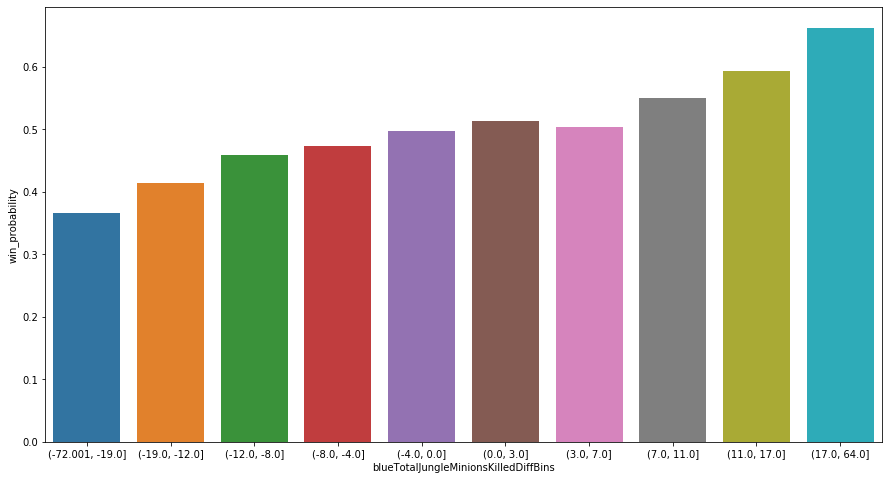

In [36]:
## 정글먹은수차이에 따른 승리
data['TotalJungleMinionsKilledDiff'] = data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled']
data['blueTotalJungleMinionsKilledDiffBins'] = pd.qcut(data['TotalJungleMinionsKilledDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('blueTotalJungleMinionsKilledDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['blueTotalJungleMinionsKilledDiffBins', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="blueTotalJungleMinionsKilledDiffBins", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled','blueTotalJungleMinionsKilledDiffBins']
data.drop(drop_cols, axis=1, inplace=True)

## 분당CS 

In [37]:
## 분당CS에 따른 승리
win=data[data.blueWins == 1]['blueCSPerMin'].mean()
lose=data[data.blueWins == 0]['blueCSPerMin'].mean()
print("이길때 분당CS : ",win)
print("질때 분당CS : ",lose)

이길때 분당CS :  22.162494929006066
질때 분당CS :  21.179308951303373


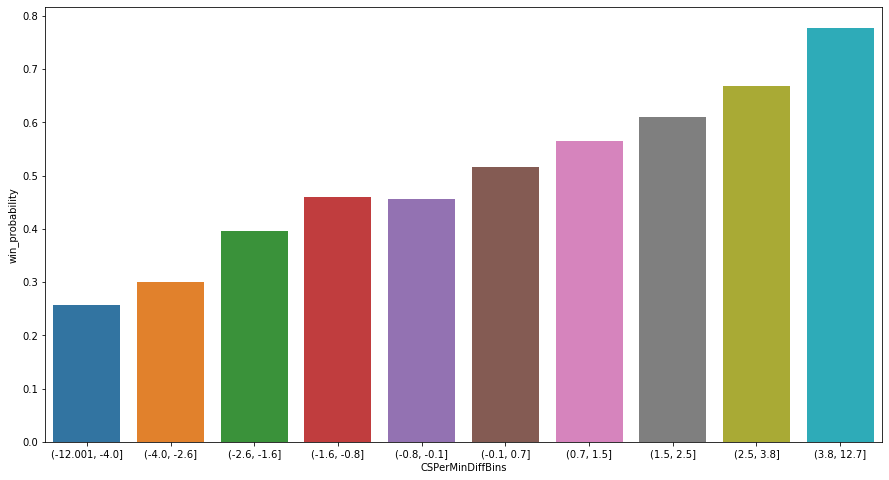

In [38]:
## 분당CS차이에 따른 승리
data['CSPerMinDiff'] = data['blueCSPerMin'] - data['redCSPerMin']
data['CSPerMinDiffBins'] = pd.qcut(data['CSPerMinDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('CSPerMinDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['CSPerMinDiffBins', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="CSPerMinDiffBins", y="win_probability", data=prob_wins)
     
# features 제거
drop_cols = ['blueCSPerMin','redCSPerMin','CSPerMinDiff','CSPerMinDiffBins']
data.drop(drop_cols, axis=1, inplace=True)

## 분당골드

In [39]:
## 분당골드에 따른 승리
win=data[data.blueWins == 1]['blueGoldPerMin'].mean()
lose=data[data.blueWins == 0]['blueGoldPerMin'].mean()
print("이길때 분당골드 : ",win)
print("질때 분당골드 : ",lose)

이길때 분당골드 :  1714.5263894523346
질때 분당골드 :  1586.4111133562378


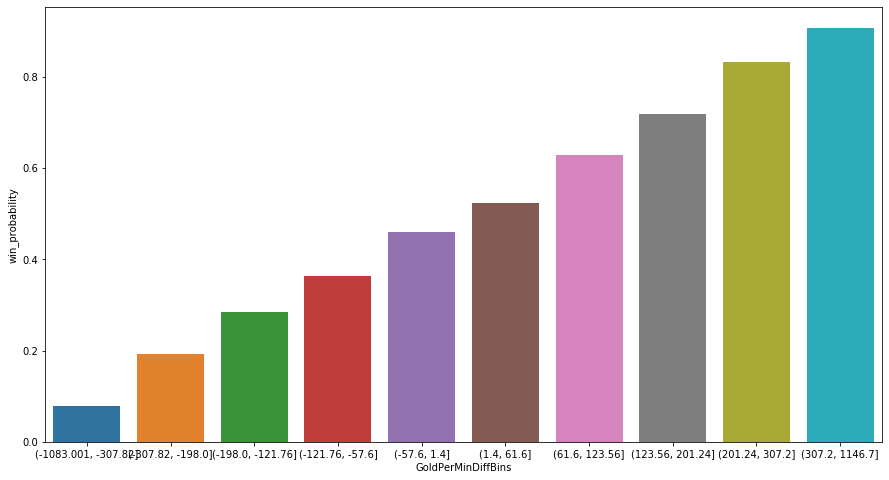

In [40]:
## 분당골드차이에 따른 승리
data['GoldPerMinDiff'] = data['blueGoldPerMin'] - data['redGoldPerMin']
data['GoldPerMinDiffBins'] = pd.qcut(data['GoldPerMinDiff'], q=10, duplicates='drop')
prob_wins = data.groupby('GoldPerMinDiffBins')['blueWins'].mean()
prob_wins = prob_wins.reset_index()
prob_wins.columns = ['GoldPerMinDiffBins', 'win_probability']
plt.figure(figsize=(15,8))
ax = sns.barplot(x="GoldPerMinDiffBins", y="win_probability", data=prob_wins)

# features 제거
drop_cols = ['blueGoldPerMin','redGoldPerMin','GoldPerMinDiff','GoldPerMinDiffBins']
data.drop(drop_cols, axis=1, inplace=True)

In [41]:
data.rename(columns={'blueFirstBlood':'FirstBlood', 'blueGoldDiff':'GoldDiff','blueExperienceDiff':'ExperienceDiff'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   gameId                        9879 non-null   int64
 1   blueWins                      9879 non-null   int64
 2   FirstBlood                    9879 non-null   int64
 3   GoldDiff                      9879 non-null   int64
 4   ExperienceDiff                9879 non-null   int64
 5   WardsPlacedDiff               9879 non-null   int64
 6   WardsDestroyedDiff            9879 non-null   int64
 7   KillsDiff                     9879 non-null   int64
 8   DeathsDiff                    9879 non-null   int64
 9   AssistsDiff                   9879 non-null   int64
 10  EliteMonstersDiff             9879 non-null   int64
 11  DragonsDiff                   9879 non-null   int64
 12  HeraldsDiff                   9879 non-null   int64
 13  TowersDestroyedDiff           987

## 상관관계

In [42]:
data.corr()

,gameId,blueWins,FirstBlood,GoldDiff,ExperienceDiff,WardsPlacedDiff,WardsDestroyedDiff,KillsDiff,DeathsDiff,AssistsDiff,EliteMonstersDiff,DragonsDiff,HeraldsDiff,TowersDestroyedDiff,TotalMinionsKilledDiff,TotalJungleMinionsKilledDiff
gameId,1.000000,0.000985,-0.011577,-0.014670,-0.012315,-0.001544,-0.008289,-0.018783,0.018783,-0.010342,-0.000423,-0.004857,0.006476,-0.007993,0.001563,-0.007151
blueWins,0.000985,1.000000,0.201769,0.511119,0.489558,0.016890,0.075205,0.479379,-0.479379,0.385866,0.259969,0.234264,0.121713,0.156179,0.309126,0.169118
FirstBlood,-0.011577,0.201769,1.000000,0.378511,0.240665,0.015850,0.045932,0.366733,-0.366733,0.303375,0.171882,0.149253,0.088875,0.109140,0.199729,0.029866
GoldDiff,-0.014670,0.511119,0.378511,1.000000,0.894729,0.024505,0.134564,0.917008,-0.917008,0.759321,0.329880,0.259292,0.211078,0.404082,0.638765,0.237028
ExperienceDiff,-0.012315,0.489558,0.240665,0.894729,1.000000,0.038276,0.123670,0.822845,-0.822845,0.605836,0.312598,0.238264,0.211124,0.296233,0.625556,0.375999
WardsPlacedDiff,-0.001544,0.016890,0.015850,0.024505,0.038276,1.000000,-0.104968,0.031802,-0.031802,0.048836,0.036029,0.032524,0.016782,0.003837,-0.028676,0.004485
WardsDestroyedDiff,-0.008289,0.075205,0.045932,0.134564,0.123670,-0.104968,1.000000,0.127299,-0.127299,0.124672,0.053635,0.060369,0.007156,0.030626,0.090088,0.011187
KillsDiff,-0.018783,0.479379,0.366733,0.917008,0.822845,0.031802,0.127299,1.000000,-1.000000,0.830751,0.320472,0.281758,0.160520,0.247669,0.435721,0.113480
DeathsDiff,0.018783,-0.479379,-0.366733,-0.917008,-0.822845,-0.031802,-0.127299,-1.000000,1.000000,-0.830751,-0.320472,-0.281758,-0.160520,-0.247669,-0.435721,-0.113480
AssistsDiff,-0.010342,0.385866,0.303375,0.759321,0.605836,0.048836,0.124672,0.830751,-0.830751,1.000000,0.255418,0.259513,0.075806,0.163933,0.266344,0.032332


In [43]:
## 상관관계 0.2 이상인것만
data_corr = data.corr()['blueWins']
cols = data_corr[abs(data_corr) > 0.2].index.tolist()
data = data[cols]
data.corr()['blueWins'].sort_values(ascending=False)
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   blueWins  FirstBlood  GoldDiff  ExperienceDiff  KillsDiff  DeathsDiff  \
0         0           1       643              -8          3          -3   
1         0           0     -2908           -1173          0           0   
2         0           0     -1172           -1033         -4           4   
3         0           0     -1321              -7         -1           1   
4         0           0     -1004             230          0           0   

   AssistsDiff  EliteMonstersDiff  DragonsDiff  TotalMinionsKilledDiff  
0            3                  0            0                      -2  
1            3                 -2           -1                     -66  
2          -10                  1            1                     -17  
3           -5                  1            0                     -34  
4           -1                 -1           -1                     -15  


# 1. logistic regression 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import accuracy_score 
from copy import copy

dataLogistic = copy(data)

## 종속변수 , 독립변수 나누기
y=dataLogistic.blueWins
X=dataLogistic.drop(columns='blueWins')

## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)
print(train_X.shape,val_X.shape)

log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
 
X = sm.add_constant(train_X)
model = sm.OLS(train_y, X)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(val_X)
acc_lm = accuracy_score(y_pred, val_y)

print('정확도 :', acc_lm)

(6915, 9) (2964, 9)
                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     321.4
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:01:20   Log-Likelihood:                -3924.4
No. Observations:                6915   AIC:                             7867.
Df Residuals:                    6906   BIC:                             7928.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4445      0.049

In [45]:
del dataLogistic['AssistsDiff']


## 종속변수 , 독립변수 나누기
y=dataLogistic.blueWins
X=dataLogistic.drop(columns='blueWins')

## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)
print(train_X.shape,val_X.shape)


log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
 
X = sm.add_constant(train_X)
model = sm.OLS(train_y, X)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(val_X)
acc_lm = accuracy_score(y_pred, val_y)

 
print('정확도 :', acc_lm)

(6915, 8) (2964, 8)
                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     367.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:01:20   Log-Likelihood:                -3924.5
No. Observations:                6915   AIC:                             7865.
Df Residuals:                    6907   BIC:                             7920.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4570      0.041

In [46]:
del dataLogistic['EliteMonstersDiff']

## 종속변수 , 독립변수 나누기
y=dataLogistic.blueWins
X=dataLogistic.drop(columns='blueWins')


## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)
print(train_X.shape,val_X.shape)


log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
 
X = sm.add_constant(train_X)
model = sm.OLS(train_y, X)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(val_X)
acc_lm = accuracy_score(y_pred, val_y)

 
print('정확도 :', acc_lm)

(6915, 7) (2964, 7)
                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     428.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:01:20   Log-Likelihood:                -3925.3
No. Observations:                6915   AIC:                             7865.
Df Residuals:                    6908   BIC:                             7912.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4587      0.041

In [47]:
del dataLogistic['FirstBlood']

## 종속변수 , 독립변수 나누기
y=dataLogistic.blueWins
X=dataLogistic.drop(columns='blueWins')

## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)
print(train_X.shape,val_X.shape)


log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
 
X = sm.add_constant(train_X)
model = sm.OLS(train_y, X)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(val_X)
acc_lm = accuracy_score(y_pred, val_y)

 
print('정확도 :', acc_lm)

(6915, 6) (2964, 6)
                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     513.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:01:20   Log-Likelihood:                -3926.2
No. Observations:                6915   AIC:                             7864.
Df Residuals:                    6909   BIC:                             7905.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4570      0.041

In [48]:
del dataLogistic['TotalMinionsKilledDiff']

print(dataLogistic.head())
## 종속변수 , 독립변수 나누기
y=dataLogistic.blueWins
X=dataLogistic.drop(columns='blueWins')

## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)
print(train_X.shape,val_X.shape)


log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
 
X = sm.add_constant(train_X)
model = sm.OLS(train_y, X)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(val_X)
acc_lm = accuracy_score(y_pred, val_y)

 
print('정확도 :', acc_lm)

   blueWins  GoldDiff  ExperienceDiff  KillsDiff  DeathsDiff  DragonsDiff
0         0       643              -8          3          -3            0
1         0     -2908           -1173          0           0           -1
2         0     -1172           -1033         -4           4            1
3         0     -1321              -7         -1           1            0
4         0     -1004             230          0           0           -1
(6915, 5) (2964, 5)
                            OLS Regression Results                            
Dep. Variable:               blueWins   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     641.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:01:20   Log-Likelihood:                -3927.2
No. Observations:                6915   AIC:                  

# 2. classification tree

In [49]:
import os
os.chdir(r"C:\\python\\datamining\\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 
os.getcwd()
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

dataClass = copy(data)

# y 기준 내림차순 정렬
dataClass.sort_values(by="blueWins", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

# target data 이름 넣기 #
target_att = 'blueWins'

## 종속변수 , 독립변수 나누기
y=dataClass.blueWins
X=dataClass.drop(columns='blueWins')

In [50]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.head())

MAX_DEPTH = 1000
sample_ratio = 0.02
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]
train = train.sort_index()

# data y의 이름을 넣으면 됌 #
uni_class = np.unique(data['blueWins'])

class_number = {}
for i in uni_class:    
    class_number[i] = len(data[data['blueWins'] == i])
    
class_number

      FirstBlood  GoldDiff  ExperienceDiff  KillsDiff  DeathsDiff  \
691            0       274            1018         -2           2   
7356           0       591             192          1          -1   
7428           0       482             466          3          -3   
2433           0       336             936          1          -1   
8593           0     -6887           -5573        -13          13   

      AssistsDiff  EliteMonstersDiff  DragonsDiff  TotalMinionsKilledDiff  
691            -4                  0           -1                      16  
7356            1                 -1           -1                     -10  
7428           -1                  1            1                      36  
2433            3                  2            1                       8  
8593          -14                  0           -1                     -90  


{0: 4949, 1: 4930}

In [51]:
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
gini_tree, gini_pprint_tree= CART_gini_ins.fit(train, target_attribute_name = "blueWins")  
CART_gini_tree, CART_gini_graph_tree = CART_gini_ins.tree, CART_gini_ins.graph_tree   
utils.get_usrt_info(train ,CART_gini_tree, target_att = "blueWins")
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# PDF 파일 출력 #
graph_dir = 'C:\\python\\p'
split = '_'
d_set_name = 'lol data '

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

class prior: [0.5019612805263823, 0.4980387194736176]
leaf node별 class수: [1430, 230]
leaf node별 class수: [569, 200]
leaf node별 class수: [365, 198]
leaf node별 class수: [80, 87]
leaf node별 class수: [125, 97]
leaf node별 class수: [212, 142]
leaf node별 class수: [121, 113]
leaf node별 class수: [106, 156]
leaf node별 class수: [129, 98]
leaf node별 class수: [187, 280]
leaf node별 class수: [379, 793]
leaf node별 class수: [264, 1542]


'C:\\python\\p\\CART___lol data _test.pdf'

In [52]:
# 성능측정 #
## train predict ##
train = data.loc[train_idx,:]

train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)
# y의 name 넣기 
classes = np.unique(train['blueWins'])
 
# train metric
train_CART_gini_all_met = utils.perform_check(train['blueWins'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# test metric
test_CART_gini_all_met = utils.perform_check(test['blueWins'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [53]:
# [accuracy, recall, precision, f1, auc] 순
print(train_CART_gini_all_met)
# [accuracy, recall, precision, f1, auc] 순
print(test_CART_gini_all_met)


[0.735037327597115, 0.7261178861788617, 0.7377387712958183, 0.7318822023047376, 0.7998858020231954]
[0.7322874493927125, 0.7424547283702213, 0.7299703264094956, 0.7361596009975062, 0.8025802472677204]


In [54]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nTrain Metric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))


Train Metric
  : ACCURACY :0.735, RECALL :0.726, PRECISION : 0.738, F1 : 0.732, AUC : 0.8


In [55]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nTest Metric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))

arr=np.array(test_CART_gini_all_met)
acc_tree=arr[0]
print(acc_tree)


Test Metric
  : ACCURACY :0.732, RECALL :0.742, PRECISION : 0.73, F1 : 0.736, AUC : 0.803
0.7322874493927125


# 3. Ramdom Forests

In [56]:
from sklearn.model_selection import GridSearchCV
dataRamdom = copy(data)

## 종속변수 , 독립변수 나누기
y=dataRamdom.blueWins
X=dataRamdom.drop(columns='blueWins')

## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)


# fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# search the best params
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(train_X, train_y)

pred_rf = clf_rf.predict(val_X)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, val_y)
print('정확도 :', acc_rf)

정확도 : 0.7398785425101214


# 4. PyTorch 

In [57]:
# PyTorch 라이브러리 임포트
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

dataCNN = copy(data)

## 종속변수 , 독립변수 나누기
y=dataCNN.blueWins
X=dataCNN.drop(columns='blueWins')

print(X.head())
## dataset scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)
## train data , test data split
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1,test_size=0.3)
print(train_X.shape,val_X.shape)

# 훈련 데이터 텐서 변환
train_X = torch.from_numpy(train_X).float()
train_y = torch.from_numpy(np.asarray(train_y))
print(train_X, train_y)
# 테스트 데이터 텐서 변환
val_X = torch.from_numpy(val_X).float()
val_y = torch.from_numpy(np.asarray(val_y))

# 설명변수와 목적변수의 텐서를 합침
train = TensorDataset(train_X, train_y)

# 미니배치로 분할
train_loader = DataLoader(train, batch_size=16, shuffle=True)

# 신경망 구성
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 96)
        self.fc2 = nn.Linear(96, 96)
        self.fc3 = nn.Linear(96, 96)
        self.fc4 = nn.Linear(96, 96)
        self.fc5 = nn.Linear(96, 96)
        self.fc6 = nn.Linear(96, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x)

    # 인스턴스 생성
model = Net()

# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 학습 시작
for epoch in range(300):
    total_loss = 0
    # 분할해 둔 데이터를 꺼내옴
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
    # 50회 반복마다 누적오차 출력
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)
        
# 계산 그래프 구성
test_x, test_y = Variable(val_X), Variable(val_y)
# 출력이 0 혹은 1이 되게 함
result = torch.max(model(test_x).data, 1)[1]
# 모형의 정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

# 모형의 정확도 출력
accuracy

print('정확도 :', accuracy)

   FirstBlood  GoldDiff  ExperienceDiff  KillsDiff  DeathsDiff  AssistsDiff  \
0           1       643              -8          3          -3            3   
1           0     -2908           -1173          0           0            3   
2           0     -1172           -1033         -4           4          -10   
3           0     -1321              -7         -1           1           -5   
4           0     -1004             230          0           0           -1   

   EliteMonstersDiff  DragonsDiff  TotalMinionsKilledDiff  
0                  0            0                      -2  
1                 -2           -1                     -66  
2                  1            1                     -17  
3                  1            0                     -34  
4                 -1           -1                     -15  
[[1.         0.51455353 0.5274023  ... 0.5        0.5        0.47773279]
 [0.         0.35529443 0.46151236 ... 0.         0.         0.21862348]
 [0.         0.4331

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


50 tensor(233.0765)
100 tensor(232.1627)
150 tensor(231.0819)
200 tensor(230.7649)
250 tensor(230.6085)
300 tensor(230.0687)
정확도 : 0.7392037786774629


# 결과

In [58]:
data_dict = {'DT': [acc_tree], 'Random Forest': [acc_rf], 'Logistic Regression': [acc_lm],'CNN':[accuracy]}
df_c = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Accuracy Score'])
print(df_c)

                     Accuracy Score
DT                         0.732287
Random Forest              0.739879
Logistic Regression        0.742915
CNN                        0.739204
